# Touch Bistro Cxc 

## Data Description

### Venues
This dataset contains information about various venues, including the following fields:
- venue_xref_id: Unique identifier for the venue
- city: The city where the venue is located.
- concept: The type or category of the venue, reflecting its primary theme or service style (e.g
BAR, FINE DINING, CAFE, BREWERY).
- country: The country where the venue is located.
- start_of_day_offset: The starting hour of the business day (e.g., 05:00:00).

### Bills
This dataset contains details about each bill, including the following fields:
- bill_paid_at_local: Datetime when the bill was paid, in the venue's local timezone.
- bill_total_billed: Total amount billed, including tax.
- bill_total_discount_item_level: Total discount amount applied to the bill.
- bill_total_gratuity: Total gratuity paid for the bill.
- bill_total_net: Net sales amount (post-discount), excluding tax or gratuity.
- bill_total_tax: Total tax amount paid for the bill.
- bill_total_voided: Total voided amount for the bill.
- bill_uuid: Unique identifier for the bil
- business_date: The operational date to which the bill item is attributed.
- order_duration_seconds: Total duration of the order in seconds. However, please note that
there may be instances of incorrect or anomalous data for this field. For example, orders plac
via the Cash Register may occasionally show order_duration_seconds values exceeding a day,
which is likely inaccurate.
- order_seated_at_local: Datetime when the party was seated, in the venue's local timezone.
- order_closed_at_local: Datetime when the order was closed, in the venue's local timezone.
- order_take_out_type_label: Indicates the type of order (e.g., online order, bar tab, dine-in,
takeout, delivery).
- order_uuid: Unique identifier for the orde
- payment_amount: Total amount paid for the bill.
- payment_count: Number of payments made for the bill.
- payment_total_tip: Total tip amount paid.
- sales_revenue_with_tax: Total sales amount (including tax) as displayed on the bill,
excluding gratuity.
- venue_xref_id: Unique identifier for the venu

- waiter_uuid: Unique identifier for the staff who processed the bil

## Objective

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



## Data Cleaning

In [5]:
# Load the data
venues_df = pd.read_csv('venues.csv')

bills_df = pd.read_csv('bills.csv')




,bill_paid_at_local,bill_total_billed,bill_total_discount_item_level,bill_total_gratuity,bill_total_net,bill_total_tax,bill_total_voided,bill_uuid,business_date,order_duration_seconds,order_seated_at_local,order_closed_at_local,order_take_out_type_label,order_uuid,payment_amount,payment_count,payment_total_tip,sales_revenue_with_tax,venue_xref_id,waiter_uuid
0,2024-07-01 09:17:01,21.81,0.0,0.0,19.30,2.51,0.0,240701091701~4D63608F-523C-4EFF-9A4F-78D6C44B5159,2024-07-01,46,2024-07-01 09:16:15,2024-07-01 09:17:01,dinein,240701091615~EF1C6E91-B6C4-4DF1-8A92-1B024197FEC3,21.81,1,0.0,21.81,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
1,2024-07-01 13:37:00,48.95,0.0,0.0,43.32,5.63,0.0,240701133659~3A0BEDE2-E9E5-484D-B909-780E485F0D69,2024-07-01,288,2024-07-01 13:32:12,2024-07-01 13:37:00,dinein,240701133212~A4C33BFA-A54F-4627-B0C2-7428427FB5DE,48.95,1,0.0,48.95,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
2,2024-07-01 11:19:32,26.94,0.0,0.0,23.84,3.10,0.0,240701111931~670EEB85-E939-4924-B92F-C95076B7E930,2024-07-01,135,2024-07-01 11:17:17,2024-07-01 11:19:32,dinein,240701111717~6074B0AB-2432-484D-BC3F-55CC5D731818,26.94,1,0.0,26.94,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
3,2024-07-01 15:05:59,3.96,0.0,0.0,3.77,0.19,0.0,240701150558~3D6F473E-D5EF-4BB8-AFAB-30DB2A0764C0,2024-07-01,48,2024-07-01 15:05:11,2024-07-01 15:05:59,dinein,240701150511~EAA68F41-20ED-4FC7-B902-B0B3878AEC82,3.96,1,0.0,3.96,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
4,2024-07-01 12:41:00,3.36,0.0,0.0,3.20,0.16,0.0,240701124059~0521794C-51FC-4C30-A368-995CE4DE105F,2024-07-01,103,2024-07-01 12:39:17,2024-07-01 12:41:00,dinein,240701123917~27764E1C-7E7F-4293-ABC7-5921310A654A,3.36,1,0.0,3.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD


In [6]:
venues_df.head()

,venue_xref_id,concept,city,country,start_of_day_offset
0,ea74268311cfcc47d2b4c38ef08b9dab0117226a9a99a9...,FAST_FOOD,Albuquerque,US,00:00:00
1,e7cec41c46a9706ba1a702b368be5431913b6dc9c9da49...,FAMILY_DINING,Brooklyn,US,00:00:00
2,e63e79791883b0c4ac71d41eaee727932c13d6a4ec8f78...,FAST_CASUAL,Windsor,CA,00:00:00
3,c100388c9328b30b6bdfbea43f113d367ae9d32b03e84b...,BAR,Burnaby,CA,01:00:00
4,a819ee7f83f27dd3d7f44515e22aca3c26e6704ddd2a9b...,FAMILY_DINING,Tisdale,CA,00:00:00


In [7]:
bills_df.head()

,bill_paid_at_local,bill_total_billed,bill_total_discount_item_level,bill_total_gratuity,bill_total_net,bill_total_tax,bill_total_voided,bill_uuid,business_date,order_duration_seconds,order_seated_at_local,order_closed_at_local,order_take_out_type_label,order_uuid,payment_amount,payment_count,payment_total_tip,sales_revenue_with_tax,venue_xref_id,waiter_uuid
0,2024-07-01 09:17:01,21.81,0.0,0.0,19.30,2.51,0.0,240701091701~4D63608F-523C-4EFF-9A4F-78D6C44B5159,2024-07-01,46,2024-07-01 09:16:15,2024-07-01 09:17:01,dinein,240701091615~EF1C6E91-B6C4-4DF1-8A92-1B024197FEC3,21.81,1,0.0,21.81,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
1,2024-07-01 13:37:00,48.95,0.0,0.0,43.32,5.63,0.0,240701133659~3A0BEDE2-E9E5-484D-B909-780E485F0D69,2024-07-01,288,2024-07-01 13:32:12,2024-07-01 13:37:00,dinein,240701133212~A4C33BFA-A54F-4627-B0C2-7428427FB5DE,48.95,1,0.0,48.95,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
2,2024-07-01 11:19:32,26.94,0.0,0.0,23.84,3.10,0.0,240701111931~670EEB85-E939-4924-B92F-C95076B7E930,2024-07-01,135,2024-07-01 11:17:17,2024-07-01 11:19:32,dinein,240701111717~6074B0AB-2432-484D-BC3F-55CC5D731818,26.94,1,0.0,26.94,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
3,2024-07-01 15:05:59,3.96,0.0,0.0,3.77,0.19,0.0,240701150558~3D6F473E-D5EF-4BB8-AFAB-30DB2A0764C0,2024-07-01,48,2024-07-01 15:05:11,2024-07-01 15:05:59,dinein,240701150511~EAA68F41-20ED-4FC7-B902-B0B3878AEC82,3.96,1,0.0,3.96,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD
4,2024-07-01 12:41:00,3.36,0.0,0.0,3.20,0.16,0.0,240701124059~0521794C-51FC-4C30-A368-995CE4DE105F,2024-07-01,103,2024-07-01 12:39:17,2024-07-01 12:41:00,dinein,240701123917~27764E1C-7E7F-4293-ABC7-5921310A654A,3.36,1,0.0,3.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,161027134744~719D0E09-5CA7-442A-B9FA-BBBF4083B4FD


- NAs 
- Outliers


In [8]:
# Check for na's in venues_df
venues_df.isna().sum()

venue_xref_id            0
concept                136
city                     0
country                  0
start_of_day_offset      0
dtype: int64

In [9]:
#check for na's in bills_df
bills_df.isna().sum()

bill_paid_at_local                 0
bill_total_billed                  0
bill_total_discount_item_level     0
bill_total_gratuity                0
bill_total_net                     0
bill_total_tax                     0
bill_total_voided                  0
bill_uuid                          0
business_date                      0
order_duration_seconds             0
order_seated_at_local              0
order_closed_at_local              0
order_take_out_type_label          0
order_uuid                         0
payment_amount                     0
payment_count                      0
payment_total_tip                  0
sales_revenue_with_tax             0
venue_xref_id                      0
waiter_uuid                       94
dtype: int64

In [10]:
# Count of rows in dataframes
print(venues_df.shape)
print(bills_df.shape)

(601, 5)
(8954786, 20)


In [11]:
#check for duplicates in venues_df venue_id
venues_df.duplicated(subset=['venue_xref_id']).sum()

0

In [12]:
# Merge the dataframes by venue_xref_id
merged_df = pd.merge(venues_df, bills_df, on='venue_xref_id', how='outer')

In [13]:
# Check shape of merged_df
merged_df.shape

(8954786, 24)

In [14]:
# Spilt the merged_df by Country
us_df = merged_df[merged_df['country'] == 'US'] 
ca_df = merged_df[merged_df['country'] == 'CA']

In [17]:
ca_df['bill_total_net'].min()

-5072.12

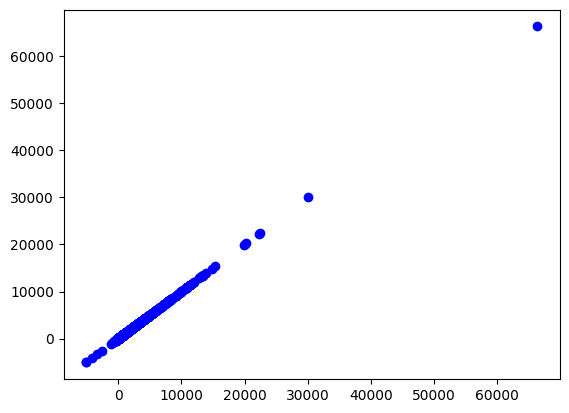

In [19]:
#plot the scatter of bill_total_net for CA
plt.scatter(ca_df['bill_total_net'], ca_df['bill_total_net'], color='blue')

In [16]:
# Check the average bill_total_net by Concept for the CA dataset
ca_df.groupby('concept')['bill_total_net'].mean() 

concept
BAKERY                   1.510278e+01
BAR                      3.820506e+01
BREWERY                  4.231891e+01
BUFFET                   9.700472e+01
CAFE                     1.854361e+01
ENTERTAINMENT_COMPLEX    5.169325e+00
FAMILY_DINING            4.427241e+01
FAST_CASUAL              2.612446e+01
FAST_FOOD                2.464189e+01
FINE_DINING              4.734037e+01
SPORTS_CLUB             -7.894919e-16
Name: bill_total_net, dtype: float64